In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import cv2

from ipywidgets import interactive, widgets
from ipywidgets import FloatSlider as fs

from PIL import Image

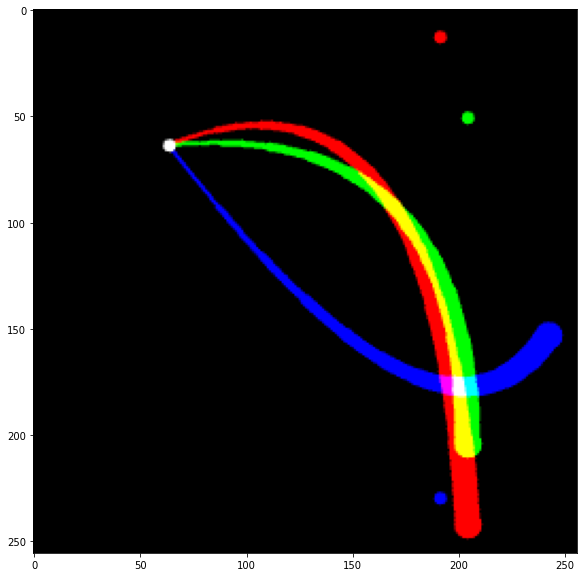

In [2]:
def normal(p, width: int):
    p = np.asarray(p)
    p = p * (width - 1) + 0.5
    return tuple(p.astype(np.int))

def draw(p0, p1, p2, radius, color, width=256, debug=False):
    x0, y0, x1, y1, x2, y2, r0, r1, c0, c1 = (*p0, *p1, *p2, *radius, *color)
    
    x0, y0, x1, y1, x2, y2 = normal((x0,y0,x1,y1,x2,y2), width*2)
    r0 = r0 * width // 2 + 1 # avoid zero radius, so add 1
    r1 = r1 * width // 2 + 1 # avoid zero radius, so add 1
    c0 = c0 * 255
    c1 = c1 * 255
    
    canvas = np.zeros([width * 2, width * 2], dtype=np.uint8)
    
    # debug draw P0, P1, P2
    if debug:
        cv2.circle(img=canvas, center=(x0,y0), radius=6, color=255, thickness=cv2.FILLED)
        cv2.circle(img=canvas, center=(x1,y1), radius=6, color=255, thickness=cv2.FILLED)
        cv2.circle(img=canvas, center=(x2,y2), radius=6, color=255, thickness=cv2.FILLED)
    
    ts = np.linspace(start=0, stop=1, num=width)
    xs = (1-ts) ** 2 * x0 + 2 * (1-ts) * ts * x1 + ts**2 * x2 
    ys = (1-ts) ** 2 * y0 + 2 * (1-ts) * ts * y1 + ts**2 * y2 
    rs = (1-ts) * r0 + ts * r1
    cs = (1-ts) * c0 + ts * c1
    
    for x, y, r, c in zip(xs, ys, rs, cs):
        cv2.circle(img=canvas, center=(int(x), int(y)), radius=int(r), color=int(c), thickness=cv2.FILLED)
        
    return cv2.resize(src=canvas, dsize=(width, width)).astype(np.uint8)

red =   draw(p0=(0.25,0.25), p1=(0.75,0.05), p2=(0.8,0.95), radius=(0.01,0.1), color=(1,1), debug=True)
green = draw(p0=(0.25,0.25), p1=(0.8,0.2),   p2=(0.8,0.8),  radius=(0.01,0.1), color=(1,1), debug=True)
blue =  draw(p0=(0.25,0.25), p1=(0.75,0.9),  p2=(0.95,0.6), radius=(0.01,0.1), color=(1,1), debug=True)

img = np.stack([red, green, blue], axis=2)

plt.figure(figsize=(10,10))
plt.imshow(img)

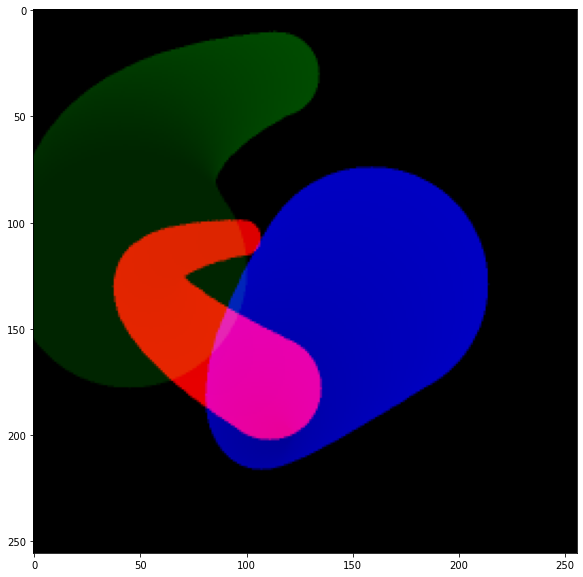

In [3]:
x0, y0, x1, y1, x2, y2, r0, r1, c0, c1 = tuple(np.random.rand(10))
red =   draw(p0=(x0,y0), p1=(x1,y1), p2=(x2,y2), radius=(r0,r1), color=(c0,c1))

x0, y0, x1, y1, x2, y2, r0, r1, c0, c1 = tuple(np.random.rand(10))
green = draw(p0=(x0,y0), p1=(x1,y1), p2=(x2,y2), radius=(r0,r1), color=(c0,c1))

x0, y0, x1, y1, x2, y2, r0, r1, c0, c1 = tuple(np.random.rand(10))
blue =  draw(p0=(x0,y0), p1=(x1,y1), p2=(x2,y2), radius=(r0,r1), color=(c0,c1))

img = np.stack([red, green, blue], axis=2)

plt.figure(figsize=(10,10))
plt.imshow(img)

In [4]:
def draw_f(x0,y0,x1,y1,x2,y2,r0,r1):
    img = draw((x0,y0), (x1,y1), (x2,y2),  (r0,r1),  (255,255))
    plt.figure(figsize=(10,10))
#     return Image.fromarray(np.uint8(img), 'L')
    plt.imshow(img, cmap='gray')
    plt.show()
    

    
interactive_plot = interactive(draw_f, 
                               x0=(0,1.0),y0=(0,1.0),
                               x1=(0,1.0),y1=(0,1.0),
                               x2=(0,1.0),y2=(0, 1.0),
                               r0=fs(min=0.01, max=1, value=0.01), r1=fs(min=0.01, max=1, value=0.01))
# interactive_plot.children[-1].layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=0.5, description='y…